# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'datasets/train.p'
validation_file= 'datasets/valid.p'
testing_file = 'datasets/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score
from scipy import interp

import math
import time
import os

import cv2

from keras.preprocessing.image import ImageDataGenerator  # data augmentation with keras
from textwrap import wrap

Using TensorFlow backend.


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
sns.set()

#### Example of Images

In the following we show 2 examples for each of the 43 sign classes in 86 panels.

In [6]:
#Get Labels from csv file
df = pd.read_csv('signnames.csv')
labels = df['SignName'].values

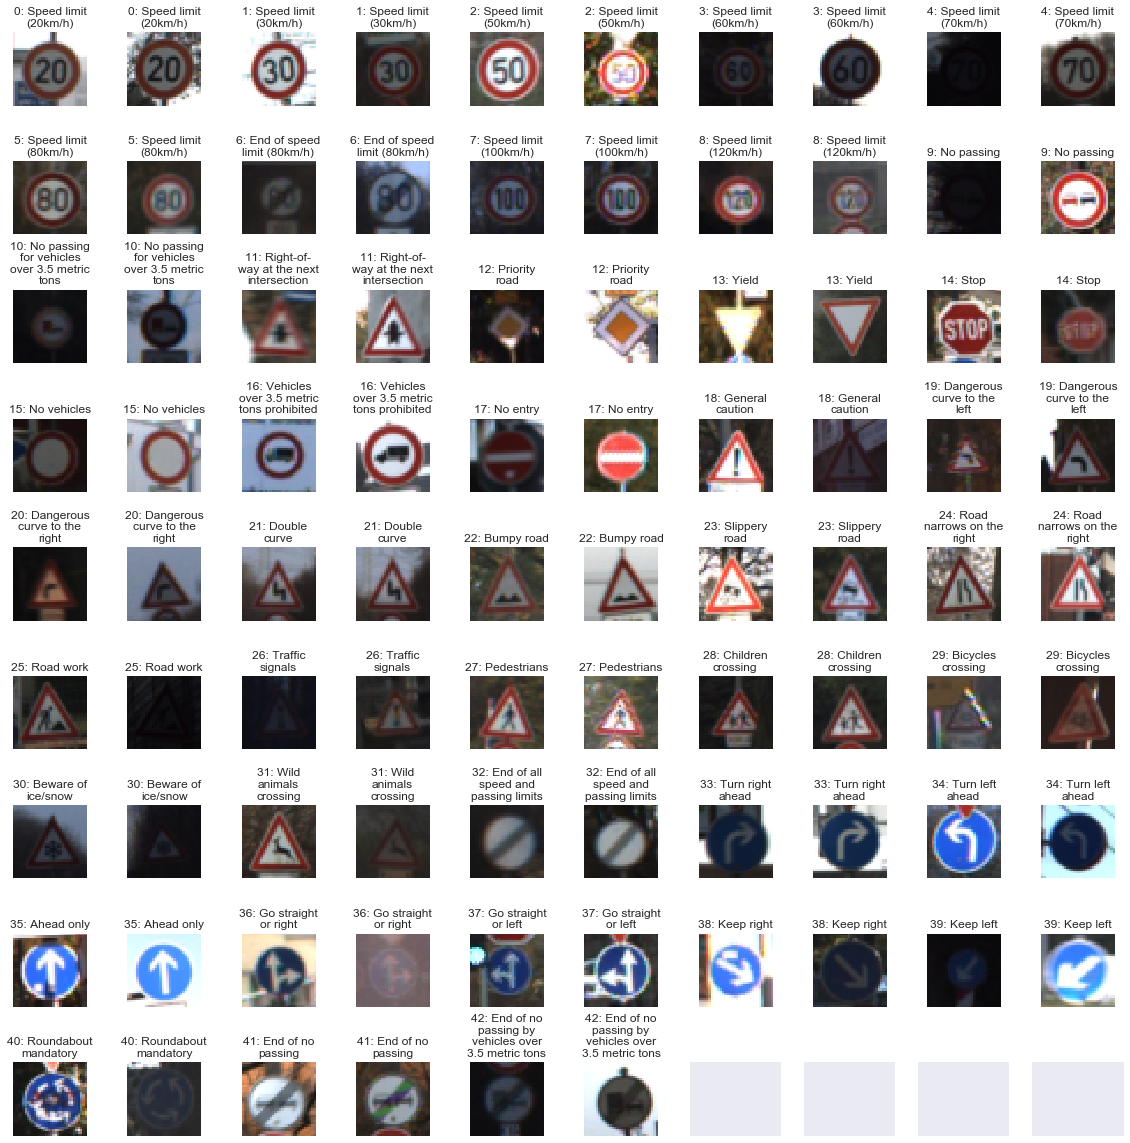

In [7]:
fig, ax = plt.subplots(9,10,figsize=(16, 16), squeeze=True, 
                       subplot_kw={'xticks': [], 'yticks': []})
for c in range(n_classes):
    im_list = np.random.permutation(X_train[y_train == c])
    pos = 2*c
    ax[pos // 10][pos % 10].imshow(im_list[0], aspect = 'equal')
    ax[pos // 10][pos % 10].set_title('\n'.join(wrap(str(c) + ': ' + labels[c], 15))) 
    
    pos = 2*c+1
    ax[pos // 10][pos % 10].imshow(im_list[1], aspect = 'equal')
    ax[pos // 10][pos % 10].set_title('\n'.join(wrap(str(c) + ': ' + labels[c], 15))) 
    
plt.tight_layout()

As can be seen from the above plot, the signs of a same class can be of differeing size, shape, bightness, contrast and even sharpness. 

#### Historgram of Class Labels

Here we plot the histograms for all three sets of data.  It sesms that the training set's distribution more closely resemble that of the test set. For instance, validation set has equal number of cases in clases 20 to 23 while the training and test sets share similar amount in those classes. Overall, the distributions of the three sets of data are fairly similar.

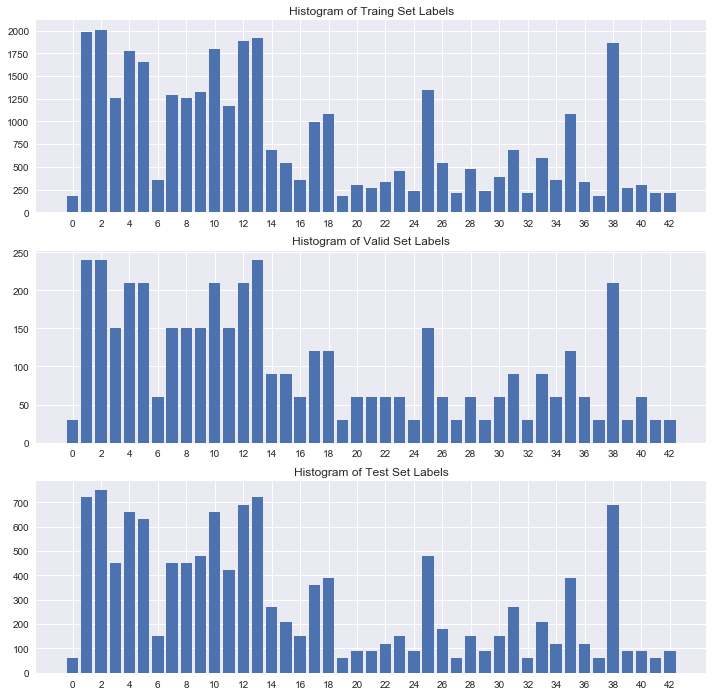

In [12]:
_, ax = plt.subplots(3, 1, figsize = (12, 12), squeeze=True)
ax[0].bar(pd.Series(y_train).value_counts().index, pd.Series(y_train).value_counts())
ax[0].set_xticks(np.arange(0, n_classes, 2), minor = False)
ax[0].set_title('Histogram of Traing Set Labels')
ax[1].bar(pd.Series(y_valid).value_counts().index, pd.Series(y_valid).value_counts())
ax[1].set_xticks(np.arange(0, n_classes, 2), minor = False)
ax[1].set_title('Histogram of Valid Set Labels')
ax[2].bar(pd.Series(y_test).value_counts().index, pd.Series(y_test).value_counts())
ax[2].set_xticks(np.arange(0, n_classes, 2), minor = False)
ax[2].set_title('Histogram of Test Set Labels');

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

Save the original data aside.

In [7]:
X_train_orig, X_valid_orig, X_test_orig = X_train, X_valid, X_test
y_train_orig, y_valid_orig, y_test_orig = y_train, y_valid, y_test

During preprocessing, we process the image by first converting the image from RGB to YUV, the equations I followed can be found on the [wiki](https://en.wikipedia.org/wiki/YUV#Conversion_to.2Ffrom_RGB):

$$Y = 0.299 R + 0.587 G + 0.114 B $$

$$ U = 0.492 B - Y $$

$$ V = 0.877 R - Y $$

(Note that I made a mistake here that the U channel actually approximately $0.492(B - Y)$, or, $-0.147R -0.288G + 0.436 B$.  Similar mistake was made with the V channel.  But I have been using this pipeline and can only leave the correct preprocessing into future work.) The Y channel, which is the brightness channel, is then histogram equalized to enhance the contrast with `cv2.equalizeHist`.  In [Sermanet and LeCun (2011)](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), they considered similar preprocessing pipeline where they would first convert image to YUV and then "The  Y  channel is  then preprocessed with  global and local contrast normalization", while U and V channels were left unchanged. Finaly we will normalize each channel by $X = (X - 128) / 128.$, this will make each channel be within the range of [-1, 1].

In [8]:
def preprocess_X(X): 
    '''
    preprocessing pipeline for images.
    First change from RGB to YUV, then histogram equalize the 
    '''
    # convert to RGB to YUV
    Y = np.sum(X * np.array([0.299, 0.587, 0.114]), axis = 3)
    VU = X[:,:,:,[0,2]] * np.array([0.877, 0.492]) - Y[:,:,:,None]
    
    X = np.concatenate((Y[:,:,:,None], VU),axis=3)
    
    # histogram equalization over intensity channel and leave U and V channels unchanged
    X = np.array([np.concatenate([cv2.equalizeHist(X[i][:,:,j].astype('uint8'))[:,:,None] 
                  if j == 0 else X[i][:,:,[j]] for j in range(3)], axis=2) 
                  for i in range(X.shape[0])])
    
    # sacle pixel numerical range to [-0.5, 0.5]
    X = (X - 128) / 128
    
    X = X.astype(np.float32)
        
    return X

In [9]:
X_train = preprocess_X(X_train_orig)
X_valid = preprocess_X(X_valid_orig)
X_test = preprocess_X(X_test_orig)

Below I show an example of the preprocessed image.

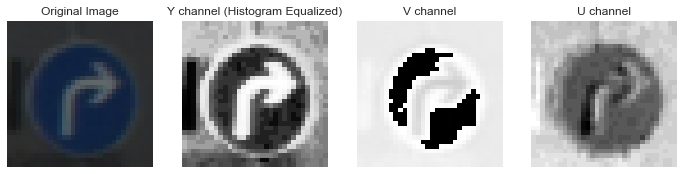

In [11]:
img_idx = 26270
fig, ax = plt.subplots(1, 4, figsize=(12, 3), squeeze=True, 
                       subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(X_train_orig[img_idx])
ax[0].set_title('Original Image')
ax[1].imshow((X_train[img_idx][:,:,0]*128+128).astype(np.uint8), cmap='gray')
ax[1].set_title('Y channel (Histogram Equalized)')
ax[3].imshow((X_train[img_idx][:,:,1]*128+128).astype(np.uint8), cmap='gray')
ax[3].set_title('U channel')
ax[2].imshow((X_train[img_idx][:,:,2]*128+128).astype(np.uint8), cmap='gray');
ax[2].set_title('V channel');

Another preprocessing step we do is to one-hot encode the y labels.

In [10]:
y_train = np.eye(n_classes, dtype = np.float32)[y_train_orig]    
y_valid = np.eye(n_classes, dtype = np.float32)[y_valid_orig]
y_test = np.eye(n_classes, dtype = np.float32)[y_test_orig]

assert(np.all(np.argmax(y_valid,axis=1) == y_valid_orig))
assert(np.all(np.argmax(y_test,axis=1) == y_test_orig))

#### Data Augmentation

While our training set data is of moderate size, chances are that we can still be short of data when we try going deep. As seen from previous plots, real world images can be taken from different standing points, viewing angles and during a different day time or weather. Hence fake data generated should also consider such effects. In the following, I will use the `ImageDataGenerator` API provided by [keras](https://keras.io/preprocessing/image/) to perform random linear transformations (shifting, rotating) to the training images.  In addtion, I will follow the PCA proecdure described in the [AlexNet paper](https://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf) to purturb image intensities in RGB channel.

*** Linear Transformation with keras.preprocessing.image.ImageDataGenerator ***

The `ImageDataGenerator` is an API defined in `keras.preprocessing.image.py` and can be imported with the following line:
```python
from keras.preprocessing.image import ImageDataGenerator
```
To begin with I create a `ImageDataGenerator` object `datagen` with the following transformation types and ranges: rotate by [-15, 15] degrees, vertically and horizontally shift by [-2, 2] pixels, and shear by [-10, 10] degrees.

In [11]:
datagen = ImageDataGenerator(rotation_range=15, height_shift_range=1/16, width_shift_range=1/16, 
                            shear_range = math.pi/18)

The first two types of transformations were used in the traffic sign recognition paper ([Sermanet and LeCun, 2011](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)).  They also did image scaling in the paper but
```ImageDataGenerator``` would scale (by setting ```zoom_range``` to a number or a list) along height and width with two different scaling ratios, thus unnaturally deform the sign shape.  Image scaling can be done manually with a transformation matrix or with opencv3 library but I am not going in that direction here.  The transforamtion
ranges are hyperparameters potentially worth tuning.

Sometimes datagen would be fitted to training set (`datagen.fit(X_train)`) prior to applying the trasnformation but since our transformation doesn't depend on the population statistics of the training data we don't need to do it here. 

During trainging we can run something like the following to train over training data with
an augmentation factor of 10.
```python
counter, batches = 0, math.ceil(10 * X_trian.shape[0] / 64)   # augment the data by a factor of 10
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=64):
    # do the training
    ...
    counter += 1
    if counter == batches:
        break
    
```
It will random shuffle the data and apply all types of transformations to each image. The ```datagen.flow()``` is a generator that will run indefinitely, which is why we have to stop the loop by checking number of batches trained over.

*** Color-channel Purturbation with PCA ***

Another transformation we will consider is to purturb the RGB channels by adding noises. We follow the procedure mentioned in the [AlexNet paper](https://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf).

To begin with we compute the covariance matrix of the RGB channels.

In [12]:
X_vec = X_train_orig.reshape(-1,3)

dev = X_vec.T - np.mean(X_vec.T, axis=1, keepdims=True)

cov_mat = 1 / (X_vec.shape[0] - 1) * dev.dot(dev.T)

Next we compute the principal compontents `lam` and their feature directions P with eigendecompostion.

In [13]:
lam, P = np.linalg.eig(cov_mat)

# check the if the eigenvectors and eigenvalues are correctly computed
for i in range(3):
    np.testing.assert_array_almost_equal(cov_mat.dot(P[:,[i]]), lam[i] * P[:,[i]],
                                         decimal=6, err_msg='', verbose=True)
    
# take the square root of the components
lam = np.sqrt(lam)

Following the AlexNet paper, during training we add noise to each of RGB channels according to

$$[p_1, p_2, p_3] [\lambda_1 \alpha_1, \lambda_2 \alpha_2, \lambda_3 \alpha_3]^\top $$

where $ p_i $ is the eigenvector of the covariance matrix (or ``P[:,[i]]``), and $\lambda_i$ is the square root of the eigenvalues (`lam[i]`) while $\alpha_i$'s are a gaussain random variable drawn for each image. Unlike AlexNet, we use
the $\lambda_i$ as square root of the eigenvalues as this would ensure the added noise would have the same covariance matrix as the image when $\alpha_i$'s are standard normal.

In [16]:
samples = np.array([np.dot(P*np.random.normal(scale=0.05, size=(3,)), lam) for _ in range(1000)])

In [17]:
def plot_hist(data, color, normed=True, bins=50):
    y, binEdges=np.histogram(data,bins=bins,normed=normed)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    plt.plot(bincenters,y,'-', color=color)

In AlexNet paper, $\alpha_i$'s are of standard deviation 0.1, here I use standard deviation of 0.05, which, as shown in the following plot, in the extreme would change the pixel value by $\pm 10$.

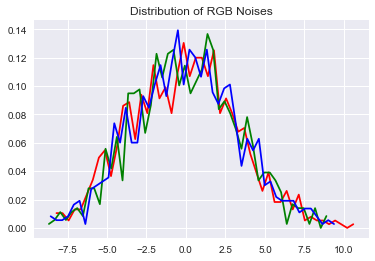

In [18]:
plot_hist(samples[:,0],'red')
plot_hist(samples[:,1],'green')
plot_hist(samples[:,2],'blue')
plt.title('Distribution of RGB Noises');

In [14]:
def add_noise_clip(X, noise):
    img = X + noise
    img[img < 0] = 0
    img[img > 255] = 255
    return img

Below we show an example how the transformation would be like. During running time,
shifting, rotatiting, shearing and PCA color shifting will all be applied to the image.

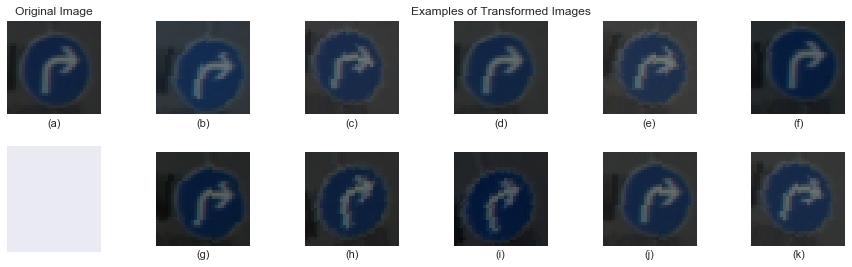

In [15]:
img_idx = 26270

fig, ax = plt.subplots(2, 6, figsize=(12, 4), squeeze=True, 
                       subplot_kw={'xticks': [], 'yticks': []})

ax[0][0].imshow(X_train_orig[img_idx])
ax[0][0].set_title('Original Image')
ax[0][0].set_xlabel('(a)')
                        
i = 0
for x_batch, y_batch in datagen.flow(X_train_orig[[img_idx]], y_train_orig[[img_idx]], batch_size=1):
    rgb = np.dot(P*np.random.normal(scale=0.1, size=(3,)), lam)
    ax[i//5][(i%5)+1].imshow(add_noise_clip(x_batch[0], rgb).astype(np.uint8))   
    ax[i//5][(i%5)+1].set_xlabel('('+str(chr(ord('b')+i)) +')')
    i += 1
    if i == 10:
        break
ax[0][3].set_title('Examples of Transformed Images');
plt.tight_layout()

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [17]:
AUTO_REUSE = None

#### Define PlaceHolders ####

In [18]:
X = tf.placeholder(shape = [None, 32, 32, 3], dtype = tf.float32)
y = tf.placeholder(shape = [None, n_classes], dtype = tf.float32)
keep_prob = tf.placeholder(shape = None, dtype = tf.float32)
is_training = tf.placeholder(shape = None, dtype = tf.bool)

#### Network Blocks ####

In the following we define each individual network layers used in buidling the neural networks.

##### Convolutional Layer #####

In [19]:
def conv_layer(X, ksize, d_in, d_out, strides, is_training, padding = 'SAME', activation = 'relu', name = 'conv'):
    with tf.variable_scope(name, reuse=AUTO_REUSE) as scope:
        W = tf.get_variable(name + '_W', shape = [ksize, ksize, d_in, d_out],
                            initializer=tf.contrib.layers.xavier_initializer())
        b = tf.get_variable(name + '_b', shape = [d_out], initializer=tf.constant_initializer(0))
        conv = tf.nn.conv2d(X, W, strides = [1, strides, strides, 1], padding = padding)
        pre_activation = tf.nn.bias_add(conv, b)
        z = tf.contrib.layers.batch_norm(pre_activation, is_training=is_training, updates_collections=None, 
                                         decay=0.9)
        
        if activation == 'relu':
            out = tf.nn.relu(z)
        elif activation == 'linear':
            out = z
        
    return out

##### Max Pooling Layer #####

In [20]:
def max_pool(X, ksize = 2, strides = 2, padding='SAME', name = 'pool'):
    out = tf.nn.max_pool(X, ksize = [1, ksize, ksize, 1], strides = [1, strides, strides, 1], padding = padding, 
                         name=name)
    return out

##### Averaging Pooling Layer #####

In [21]:
def avg_pool(X, ksize = 2, strides = 2, padding='SAME', name = 'pool'):
    out = tf.nn.avg_pool(X, ksize=[1, ksize, ksize, 1], strides=[1, strides, strides, 1], padding = padding,
                        name=name)
    return out

##### Fully Connected Layer #####

In [22]:
def fc_layer(X, d_out, is_training, name):
    with tf.variable_scope(name, reuse=AUTO_REUSE) as scope:
        d_in = X.get_shape()[1].value
        W = tf.get_variable(name + '_W', shape = [d_in, d_out], initializer=tf.contrib.layers.xavier_initializer())
        b = tf.get_variable(name + '_b', shape = [d_out], initializer=tf.constant_initializer(0))
        pre_activation = tf.matmul(X, W) + b
        out = tf.contrib.layers.batch_norm(pre_activation, is_training=is_training, updates_collections=None, 
                                           decay=0.9)
    return out

##### Inception Module #####

In [23]:
def inception_module(X, depths, is_training, name):
    d_in = X.get_shape()[3].value
    d1, d3_reduce, d3, d5_reduce, d5, d_poolproj = depths['d1'], depths['d3_reduce'], depths['d3'], \
                                        depths['d5_reduce'], depths['d5'], depths['d_poolproj']
    
    conv1 = conv_layer(X, ksize=1, d_in=d_in, d_out=d1, strides=1, is_training=is_training, 
                       name=name+'_conv1')
    
    conv3_reduce = conv_layer(X, ksize=1, d_in=d_in, d_out=d3_reduce, strides=1, 
                        is_training=is_training, name=name+'_conv3_reduce')
    conv3 = conv_layer(conv3_reduce, ksize=3, d_in=d3_reduce, d_out=d3, strides=1, 
                        is_training=is_training, name=name+'_conv3')
    
    conv5_reduce = conv_layer(X, ksize=1, d_in=d_in, d_out=d5_reduce, strides=1,
                             is_training=is_training, name=name+'_conv5_reduce')
    conv5 = conv_layer(conv5_reduce, ksize=5, d_in=d5_reduce, d_out=d5, strides=1,
                        is_training=is_training, name=name+'_conv5')
    
    pool = max_pool(X, ksize=3, strides=1, name=name+'_pool')
    pool_proj = conv_layer(pool, ksize=1, d_in=d_in, d_out=d_poolproj, strides=1,
                          is_training=is_training, name=name+'_pool_proj')
    
    out = tf.concat(values=[conv1, conv3, conv5, pool_proj], concat_dim=3, name=name+'_concat')
    return out

#### Network Structures ####

Below we define three netwok structures: GoogLeNet-like, VGG-16-like, and LeNet5-like. A function is first defined
for building the network structure, follwed by a table detailing the network structure. Note that unless specified,
`'SAME'` padding is always used in either convolutional or pooling layers.

***GoogLeNet-Like***

In [24]:
def GoogLeNet_like(X, keep_prob, is_training):
    
    conv0 = conv_layer(X, ksize=3, d_in=3, d_out=64, strides=1, is_training=is_training, name='conv0')
    conv1 = conv_layer(conv0, ksize=3, d_in=64, d_out=64, strides=1, is_training=is_training, name='conv1')
    pool0 = max_pool(conv1, ksize=3, strides=2, name='pool0')
    
    inception0 = inception_module(X=pool0, is_training=is_training, name='inception0',
                                 depths={'d1': 32, 'd3_reduce': 32, 'd3': 64, 'd5_reduce': 8, 'd5': 16,
                                        'd_poolproj': 16})
    inception1 = inception_module(X=inception0, is_training=is_training, name='inception1',
                                  depths={'d1': 64, 'd3_reduce': 48, 'd3': 128, 'd5_reduce': 16, 'd5': 32,
                                          'd_poolproj': 32})
    pool1 = max_pool(inception1, ksize=3, strides=2, name='pool1')
    
    inception2 = inception_module(X=pool1, is_training=is_training, name='inception2',
                                 depths={'d1': 128, 'd3_reduce': 64, 'd3': 256, 'd5_reduce': 24, 'd5': 64,
                                        'd_poolproj': 64})
    inception3 = inception_module(X=inception2, is_training=is_training, name='inception3',
                                  depths={'d1': 128, 'd3_reduce': 64, 'd3': 256, 'd5_reduce': 24, 'd5': 64,
                                          'd_poolproj': 64})
    pool2 = avg_pool(inception3, ksize=8, strides=1, padding='VALID')
    
    flatten = tf.contrib.layers.flatten(pool2)
    
    flatten_drop = tf.nn.dropout(flatten, keep_prob = keep_prob)
    
    fc0_pre = fc_layer(flatten_drop, n_classes, is_training, 'fc0')
    
    return fc0_pre

Network strutucture for the GoogLeNet-Like Network

| Layer       | patch size/stride         |    Output |  # 1x1|  # 3x3 reduce | # 3x3 | # 5x5 reduce | # 5x5 | # pool proj| 
|:-------------:|:-------------:|:-----:|:----:|:----:|:----:|:----:|:----:|:----:|
| Input         | | 32x32x3|   |  |  |   |   |  |
| convolution   | 3x3/1 | 32 x 32 x 64|   |  |  |   |   |  |
| convolution   | 3x3/1 | 32 x 32 x 64|   |  |  |   |   |  |
| max pooling    | 3x3/2 | 16x16x64|   |  |  |   |   |  |
| inception module |      | 16x16x128| 32 | 32| 64 | 8  | 16   | 16  |
| inception module |      | 16x16x256| 64 | 48| 128 | 16  | 32   | 32  |
| max pooling    | 3x3/2 | 8x8x256|   |  |  |   |   |  |
| inception module |      | 8x8x512| 128 | 64| 256 | 24  | 64   | 64  |
| inception module |      | 8x8x512| 128 | 64| 256 | 24  | 64   | 64  |
| avg pooling*  | 8x8/1  |  1x1x512|   |  |  |   |   |  |
| flatten  |      |   512   |   |  |  |   |   |    |
| dropout (50 %) |   | 512  |   |  |  |   |   |    |
| linear |        | 43  |   |  |  |   |   |    |
| softmax  |   |43   |  |  |   |   |    |

\* Valid Padding

***VGG-16-Like***

In [23]:
def vgg_like(X, keep_prob, is_training):
    '''
    Similar structure as VGG_ILSVRC_16_layers
    https://gist.github.com/ksimonyan/211839e770f7b538e2d8#file-readme-md
    '''
    #X = tf.reshape(X, (-1, 32, 32, 1))
    
    conv0 = conv_layer(X, ksize = 3, d_in = 3, d_out = 64, strides = 1, is_training = is_training, name = 'conv0')
    conv1 = conv_layer(conv0, ksize = 3, d_in = 64, d_out = 64, strides = 1, is_training = is_training, name = 'conv1')
    pool0 = max_pool(conv1, ksize = 2, strides = 2, name = 'pool0')
    
    conv2 = conv_layer(pool0, ksize = 3, d_in = 64, d_out = 128, strides = 1, is_training = is_training, name = 'conv2')
    conv3 = conv_layer(conv2, ksize = 3, d_in = 128, d_out = 128, strides = 1, is_training = is_training, name = 'conv3')
    pool1 = max_pool(conv3, ksize = 2, strides = 2, name = 'pool1')
    
    conv4 = conv_layer(pool1, ksize = 3, d_in = 128, d_out = 256, strides = 1, is_training = is_training, name = 'conv4')
    conv5 = conv_layer(conv4, ksize = 3, d_in = 256, d_out = 256, strides = 1, is_training = is_training, name = 'conv5')
    conv6 = conv_layer(conv5, ksize = 3, d_in = 256, d_out = 256, strides = 1, is_training = is_training, name = 'conv6')
    pool2 = max_pool(conv6, ksize = 2, strides = 2, name = 'pool2')

    flatten = tf.contrib.layers.flatten(pool2)
    
    fc0_pre = fc_layer(flatten, 512, is_training, 'fc0')
    fc0 = tf.nn.relu(fc0_pre)
    fc0_drop = tf.nn.dropout(fc0, keep_prob = keep_prob)
    
    fc1_pre = fc_layer(fc0_drop, 512, is_training, 'fc1')
    fc1 = tf.nn.relu(fc1_pre)
    fc1_drop = tf.nn.dropout(fc1, keep_prob = keep_prob)
    
    fc2_pre = fc_layer(fc1_drop, n_classes, is_training, 'fc2')
    return fc2_pre

Network strutucture for the VGG-16-Like Network

|  Layer  |  patch size/stride | Output |
|:-------:|:-------:|:-------:|
| Input     |     | 32x32x3   |
| convolution| 3x3/1 | 32x32x64|
| convolution| 3x3/1 | 32x32x64|
| max pooling| 2x2/2 | 16x16x64|
| convolution| 3x3/1 | 16x16x128|
| convolution| 3x3/1 | 16x16x128|
| max pooling| 2x2/2 | 8x8x128|
| convolution| 3x3/1 | 8x8x256|
| convolution| 3x3/1 | 8x8x256|
| convolution| 3x3/1 | 8x8x256|
| max pooling| 2x2/2 | 2x2x256|
| flatten |     |  1024|
| fully connected relu | | 512|
|dropout (50%) |  | 512|
| fully connected relu | | 512|
|dropout (50%) |  | 512|
| fully connected linear| | 43|
| softmax  |   |43   |

***LeNet5-Like***

In [24]:
def lenet5_like(X, keep_prob, is_training):
   
    conv0 = conv_layer(X, ksize = 5, d_in = 3, d_out = 6, strides = 1, is_training = is_training, name = 'conv0')
    pool0 = max_pool(conv0, ksize = 2, strides = 2, name = 'pool0')
    
    conv1 = conv_layer(pool0, ksize = 5, d_in = 6, d_out = 16, strides = 1, is_training = is_training, name = 'conv1')
    pool1 = max_pool(conv1, ksize = 2, strides = 2, name = 'pool1')
    
    flatten = tf.contrib.layers.flatten(pool1)
    
    fc0_pre = fc_layer(flatten, 120, is_training, 'fc0')
    fc0 = tf.nn.relu(fc0_pre)
    fc0_drop = tf.nn.dropout(fc0, keep_prob = keep_prob)
    
    fc1_pre = fc_layer(fc0_drop, 84, is_training, 'fc1')
    fc1 = tf.nn.relu(fc1_pre)
    fc1_drop = tf.nn.dropout(fc1, keep_prob = keep_prob)
    
    fc2_pre = fc_layer(fc1_drop, n_classes, is_training, 'fc2')
    return fc2_pre

Network strutucture for the LeNet5-Like Network

|  Layer  |  patch size/stride | Output |
|:-------:|:-------:|:-------:|
| Input     |     | 32x32x3   |
| convolution| 5x5/1 | 32x32x6|
| max pooling| 2x2/2 | 16x16x6|
| convolution| 5x5/1 | 16x16x16|
| max pooling| 2x2/2 | 8x8x16|
| flatten |     | 1024|
| fully connected relu | | 120|
|dropout (50%) |  |120|
| fully connected relu | | 84|
|dropout (50%) |  |84|
| fully connected linear| | 43|
| softmax  |   |43   |

#### Define Cost Function

The objective of the training is the cross entropy loss.

In [25]:
def cost(y, z_pred):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = z_pred, labels = y))

#### Define Loss , accuracy and Prediction Operatior

The inference function, when called, creates a network graph that gives the logits `z_pred` for each training data fed in. `z_pred` is further used to compute the predicted y label probabilities, loss function, and accuracy.

We can change the line assigning to `z_pred` to `z_pred = GoogLeNet_like(X, keep_prob, is_training)` for training the GoogLeNet-like network.

In [26]:
def inference(X, y, keep_prob, is_training):
    z_pred = GoogLeNet_like(X, keep_prob, is_training)
    loss = cost(y, z_pred)
    
    y_pred = tf.nn.softmax(z_pred)
    
    correct = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    return loss, accuracy, y_pred

#### Evaluation Function ####

Evaluate loss and traffic over the fed-in `X_in` and `y_in`.  The evaluation is done in batches of batch_size data points.

In [27]:
def evaluate(X_in, y_in, batch_size):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    
    size = y_in.shape[0]
    batch_parts = math.ceil(size / batch_size)
    y_out = []
    
    tot_loss, tot_acc = 0, 0
    sess = tf.get_default_session()
    
    for b in range(batch_parts):
        start = batch_size * b
        end = batch_size * (b+1)
                
        X_batch, y_batch = X_in[start:end], y_in[start:end]
        b_size = y_batch.shape[0]       
                
        tmp_loss, tmp_acc, predicted_y = sess.run([loss, accuracy, y_pred], feed_dict = {X: X_batch, y: y_batch, keep_prob: 1, is_training: False})
        
        tot_loss += (tmp_loss * b_size)
        tot_acc += (tmp_acc * b_size) 
        y_out.append(predicted_y)
        
    return tot_loss / size, tot_acc / size, np.concatenate(y_out)

#### Create the Network Graph

Call the inference function to create the network graph and `loss`, `accuracy`, `y_pred` (for predicting y labels) operators.

In [28]:
loss, accuracy, y_pred = inference(X, y, keep_prob, is_training)

In [31]:
AUTO_REUSE = True

#### Create the Training Operator

Use the Adam optimizer with learning rate of 0.003 to minimize the cross entropy loss.

In [29]:
train_op = tf.train.AdamOptimizer(learning_rate = 0.003).minimize(loss)

In [30]:
init = tf.global_variables_initializer()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

Train with batch size of 64 samples.  The same batch size is also used for evaluation.

In [31]:
epochs = 40
batch_size = 64
batch_parts = math.ceil(n_train / batch_size)

train_loss_ep = np.zeros((epochs,), dtype = np.float32)
train_acc_ep = np.zeros((epochs,), dtype = np.float32)

valid_loss_ep = np.zeros((epochs,), dtype = np.float32)
valid_acc_ep = np.zeros((epochs,), dtype = np.float32)

augmented_batch_parts = batch_parts * 3

In [32]:
IMG_AUGMENT = True

In [33]:
cum_epochs = 30

In [32]:
ckpt_file = 'models/GoogLeNet_0.ckpt'

#### Training Procedure

In [ ]:
with tf.Session().as_default() as sess:
    sess.run(init)
    
    saver = tf.train.Saver()
    
    if os.path.isfile(ckpt_file + '.meta'):
        saver.restore(sess, ckpt_file)
        #pass
            
    for e in range(cum_epochs, epochs):
        start_time_ep = time.perf_counter()
        start_time_ba = time.perf_counter()
        
        X_train, y_train = shuffle(X_train, y_train)
            
        for b in range(batch_parts):
            start = batch_size * b
            end = batch_size * (b+1)
            
            X_batch, y_batch = X_train[start:end], y_train[start:end]
            
            sess.run(train_op, feed_dict = {X: X_batch, y: y_batch, keep_prob: 0.5, is_training: True})
            
            if (b + 1) % 200 == 0:
                train_loss, train_acc, _ = evaluate(X_train, y_train, batch_size) 
                valid_loss, valid_acc, _ = evaluate(X_valid, y_valid, batch_size)  
                
                elapsed = time.perf_counter() - start_time_ba
                
                if IMG_AUGMENT == False:
                    print('ep {:>2d}, batch {:>3d}/{:d}; {:3.2f} secs;'.format(e+1, b+1, batch_parts, elapsed),
                      'traing loss: {:3.3f}, tr_accuracy: {:6.4f};'.format(train_loss, train_acc),
                      'validation loss: {:3.3f}, v_accuracy: {:6.4f}'.format(valid_loss, valid_acc))
                else:
                    print('ep {:>2d}, batch {:>3d}/{:d}; {:3.2f} secs;'.format(e+1, b+1, augmented_batch_parts, elapsed),
                      'traing loss: {:3.3f}, tr_accuracy: {:6.4f};'.format(train_loss, train_acc),
                      'validation loss: {:3.3f}, v_accuracy: {:6.4f}'.format(valid_loss, valid_acc))
  
                start_time_ba = time.perf_counter()
    
            if (b + 1) % 50 == 0 or b == batch_parts - 1:
                saver.save(sess, ckpt_file)   
                #pass
     
        if IMG_AUGMENT == True:
            cnt = 0
                        
            for x_b, y_b in datagen.flow(X_train_orig, y_train_orig, batch_size=batch_size, 
                                        shuffle=True):                
                X_batch = []                
                for i in range(len(x_b)):
                    rgb = np.dot(P*np.random.normal(scale=0.05, size=(3,)), lam)
                    X_batch += [add_noise_clip(x_b[i], rgb)]
                               
                X_batch = preprocess_X(np.array(X_batch))
                y_batch = np.eye(n_classes, dtype = np.float32)[y_b]
                
                sess.run(train_op, feed_dict = {X: X_batch, y: y_batch, keep_prob: 0.5, is_training: True})
                
                if (cnt + batch_parts + 1) % 200 == 0:
                    train_loss, train_acc, _ = evaluate(X_train, y_train, batch_size) 
                    valid_loss, valid_acc, _ = evaluate(X_valid, y_valid, batch_size)  
                    
                    elapsed = time.perf_counter() - start_time_ba
                    print('ep {:>2d}, batch {:>3d}/{:d}; {:3.2f} secs;'.format(e+1, cnt + batch_parts + 1, 
                                                                               augmented_batch_parts, elapsed),
                          'traing loss: {:3.3f}, tr_accuracy: {:6.4f};'.format(train_loss, train_acc),
                          'validation loss: {:3.3f}, v_accuracy: {:6.4f}'.format(valid_loss, valid_acc))
  
                    start_time_ba = time.perf_counter()
    
                if (cnt + batch_parts + 1) % 50 == 0 or cnt == augmented_batch_parts - batch_parts - 1:
                    saver.save(sess, ckpt_file) 
                    #pass
                
                cnt += 1
                
                if cnt == augmented_batch_parts - batch_parts:
                    break
                    
        epoch = e
        train_loss_ep[epoch], train_acc_ep[epoch], _ = evaluate(X_train, y_train, batch_size) 
        valid_loss_ep[epoch], valid_acc_ep[epoch], _ = evaluate(X_valid, y_valid, batch_size) 
        elapsed = time.perf_counter() - start_time_ep
        
        if IMG_AUGMENT == False:
            print('ep {:>2d}, batch {:>3d}/{:d}; {:3.2f} secs;'.format(epoch+1, b+1, batch_parts, elapsed),
                  'traing loss: {:3.3f}, tr_accuracy: {:6.4f};'.format(train_loss_ep[epoch], train_acc_ep[epoch]),
                  'validation loss: {:3.3f}, v_accuracy: {:6.4f}'.format(valid_loss_ep[epoch], valid_acc_ep[epoch]))    
        else:
            print('ep {:>2d}, batch {:>3d}/{:d}; {:3.2f} secs;'.format(epoch+1, cnt+batch_parts, 
                                                                       augmented_batch_parts, elapsed),
                  'traing loss: {:3.3f}, tr_accuracy: {:6.4f};'.format(train_loss_ep[epoch], train_acc_ep[epoch]),
                  'validation loss: {:3.3f}, v_accuracy: {:6.4f}'.format(valid_loss_ep[epoch], valid_acc_ep[epoch])) 
                

Below we plot the training and validation performance evaluated during training.

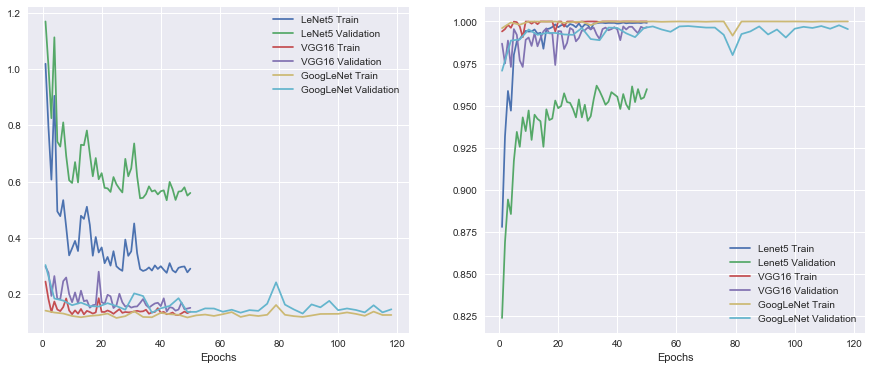

In [56]:
data_lenet = np.load('./lenet5-like.npz')
data_vgg = np.load('./vgg16-like.npz')
data_googl = np.load('./GoogLeNet-like.npz')

fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(np.arange(1,51), data_lenet['train_loss_ep'], label = 'LeNet5 Train')
ax[0].plot(np.arange(1,51), data_lenet['valid_loss_ep'], label = 'LeNet5 Validation')
ax[0].plot(np.arange(1,51), data_vgg['train_loss_ep'], label = 'VGG16 Train')
ax[0].plot(np.arange(1,51), data_vgg['valid_loss_ep'], label = 'VGG16 Validation')
ax[0].plot(np.arange(1,121,3), data_googl['train_loss_ep'][:40], label = 'GoogLeNet Train')
ax[0].plot(np.arange(1,121,3), data_googl['valid_loss_ep'][:40], label = 'GoogLeNet Validation')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(np.arange(1,51), data_lenet['train_acc_ep'], label = 'Lenet5 Train')
ax[1].plot(np.arange(1,51), data_lenet['valid_acc_ep'], label = 'Lenet5 Validation')
ax[1].plot(np.arange(1,51), data_vgg['train_acc_ep'], label = 'VGG16 Train')
ax[1].plot(np.arange(1,51), data_vgg['valid_acc_ep'], label = 'VGG16 Validation')
ax[1].plot(np.arange(1,121,3), data_googl['train_acc_ep'][:40], label = 'GoogLeNet Train')
ax[1].plot(np.arange(1,121,3), data_googl['valid_acc_ep'][:40], label = 'GoogLeNet Validation')
ax[1].legend()
ax[1].set_xlabel('Epochs');

After training the VGG-16-like and LeNet5-like networks over 50 epochs of non-augmented data, and the GoogLeNet-like network for 40 epochs of epochs of augmented data (augmention factor: 3), below we report the final loss and accuracy over the training and validation sets.  Apparently the LeNet5-like network suffer from larger scale of overfitting.  It is not clear if the rest two network structure suffer from overfitting but it seems also applies for the two as well.  But VGG-16 seem to be a better network from the validation accuracy standing point.

|      | Training Loss        | Validation Loss |         Training Accuracy         |  Validation Accuracy       |
| ------------- |:-------------:| --------:|--------:|--------------:|
| VGG-16-Like     |0.1376  | 0.1510 |   1    |   0.9966                  |
| GoogLeNet-Like      | 0.1256      |   0.1457 |   1  | 0.9955      |
| LeNet5-Like | 0.2903      |     0.5597 |  0.9992     |    0.9599   |


*** Test Set Performance ***

We also evaluate test set loss and accuracy for the three models.  VGG-16-like is apparently the best. Comparatively, the GoogLeNet-like network made roughly 18 more mistakes.


|      | Loss        | Accuracy  |
| ------------- |:-------------:| -----:|
| VGG-16-Like     |0.1915  | 0.9908 |
| GoogLeNet-Like      | 0.1852      |   0.9894 |
| LeNet5-Like | 0.5995      |    0.9468 |


In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    saver = tf.train.Saver()
    
    if os.path.isfile(ckpt_file + '.meta'):
        saver.restore(sess, ckpt_file)    
    
    test_loss, test_acc, y_test_prob = evaluate(X_test, y_test, batch_size) 
        
    print('test loss: {:>3.3f}, test accuracy: {:>6.4f}'.format(test_loss, test_acc))

test loss: 0.185, test accuracy: 0.9894


*** Compute precision and reall ***

In [34]:
y_predict = np.argmax(y_test_prob, axis = 1)

precision = np.zeros(n_classes)
recall = np.zeros(n_classes)

for i in range(n_classes):
    precision[i] = sum((y_predict == i) & (y_test_orig == i)) / sum(y_predict == i)
    recall[i] = sum((y_predict == i) & (y_test_orig == i)) / sum(y_test_orig == i)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

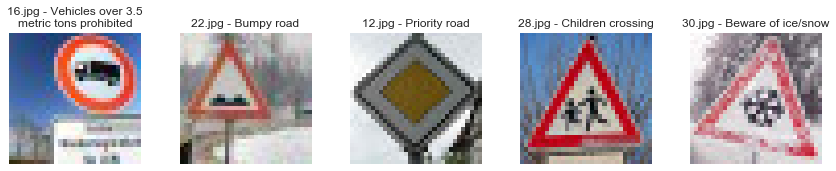

In [35]:
image_list=os.listdir("images/")

n_test_new = len(image_list)

y_test_new = np.zeros((n_test_new,), dtype=np.int)
X_test_new = np.zeros((n_test_new, 32, 32, 3), dtype=np.uint8)

fig, ax = plt.subplots(1, 5, figsize=(12, 6), squeeze=True, 
                       subplot_kw={'xticks': [], 'yticks': []})

for i, img_fp in enumerate(image_list):
    end = img_fp.find('.')
    y_test_new[i] = int(img_fp[:end])
    image = cv2.imread('images/' + img_fp)
    image = image[:,:,::-1]
    X_test_new[i] = image
    
    ax[i % 5].imshow(image)
    ax[i % 5].set_title('\n'.join(wrap(img_fp +' - '+labels[int(y_test_new[i])],30)))
    
plt.tight_layout()
plt.show()

In [36]:
X_test_new = preprocess_X(X_test_new)

In [37]:
y_test_new = np.eye(n_classes)[y_test_new]

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [38]:
with tf.Session() as sess:
    sess.run(init)
    
    saver = tf.train.Saver()
    
    if os.path.isfile(ckpt_file + '.meta'):
        saver.restore(sess, ckpt_file)
        
    test_loss, test_acc, y_pred_new = sess.run([loss, accuracy, y_pred], feed_dict = {X: X_test_new, y: y_test_new, keep_prob: 1, is_training: False})

#### Print out the predicted classes for each of the images

*** VGG-16-Like ***

test loss: 2.078, test accuracy: 0.6000
Actual test label: 16 (Vehicles over 3.5 metric tons prohibited);	Predicted Label: Yield
Actual test label: 22 (Bumpy road);					Predicted Label: Speed limit (20km/h)
Actual test label: 12 (Priority road);					Predicted Label: Priority road
Actual test label: 28 (Children crossing);				Predicted Label: Children crossing
Actual test label: 30 (Beware of ice/snow);				Predicted Label: Beware of ice/snow


*** GoogLeNet-Like ***

In [39]:
print('test loss: {:>3.3f}, test accuracy: {:>6.4f}'.format(test_loss, test_acc))
n_tabs = 6
for i in range(5):
    actual_tabs = n_tabs - math.floor(len(labels[np.argmax(y_test_new, axis=1)[i]]) / 8)
    print(''.join(['Actual test label: {0} ({1});'.format(np.argmax(y_test_new, axis=1)[i], 
                                                       labels[np.argmax(y_test_new, axis=1)[i]])]
                  + ['\t' for _ in range(actual_tabs)]
                  + ['Predicted Label: {0}'.format(labels[np.argmax(y_pred_new, axis=1)[i]])]))

test loss: 0.995, test accuracy: 0.8000
Actual test label: 16 (Vehicles over 3.5 metric tons prohibited);	Predicted Label: Vehicles over 3.5 metric tons prohibited
Actual test label: 22 (Bumpy road);					Predicted Label: Bumpy road
Actual test label: 12 (Priority road);					Predicted Label: Priority road
Actual test label: 28 (Children crossing);				Predicted Label: Children crossing
Actual test label: 30 (Beware of ice/snow);				Predicted Label: Speed limit (100km/h)


#### Precision and Recall Bar Chart

*** VGG-16-Like *** 

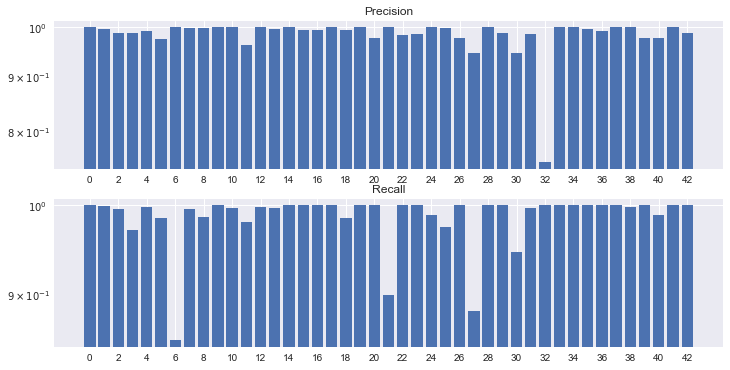

*** GoogLeNet-Like ***

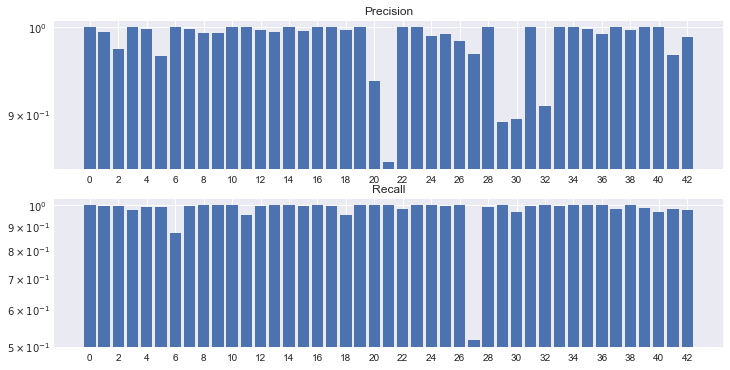

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].bar(np.arange(43), precision, )
ax[0].set_xticks(np.arange(0, n_classes, 2));
ax[0].set_yscale('log')
ax[0].set_title('Precision')

ax[1].bar(np.arange(43), recall)
ax[1].set_xticks(np.arange(0, n_classes, 2));
ax[1].set_yscale('log');
ax[1].set_title('Recall');

### Analyze Performance

|      |  Accuracy  |
|:-----|:-----------|
| VGG-16-Like | 0.6 |
| GoogLeNet-Like | 0.8|

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [42]:
with tf.Session() as sess:
    res = sess.run(tf.nn.top_k(tf.constant(y_pred_new), k=5))

In [ ]:
for i in range(5):
    print('Test Case {0}, Actual Label: {1} ({2})'.format(i+1, np.argmax(y_test_new,axis=1)[i], 
              labels[np.argmax(y_test_new,axis=1)[i]])) 
    print('|'.join(['', 'Probability', 'Prediction', '']))
    print('|:----:|:----:|')
    for j in range(5):
        print('|'.join(['', '{0:.3f}'.format(res[0][i,j]), 
                        '{0} ({1})'.format(res[1][i,j],labels[res[1][i,j]]), '']))
    print()

Below I show the top five prediction probabilities of each of the five images for both images.

***VGG-16-Like***

Test Case 1, Actual Label: 16 (Vehicles over 3.5 metric tons prohibited)

|Probability|Prediction|
|:----:|:----:|
|0.179|13 (Yield)|
|0.083|5 (Speed limit (80km/h))|
|0.052|38 (Keep right)|
|0.048|2 (Speed limit (50km/h))|
|0.042|9 (No passing)|

Test Case 2, Actual Label: 22 (Bumpy road)

|Probability|Prediction|
|:----:|:----:|
|0.753|0 (Speed limit (20km/h))|
|0.015|12 (Priority road)|
|0.014|1 (Speed limit (30km/h))|
|0.013|38 (Keep right)|
|0.013|13 (Yield)|

Test Case 3, Actual Label: 12 (Priority road)

|Probability|Prediction|
|:----:|:----:|
|0.771|12 (Priority road)|
|0.016|2 (Speed limit (50km/h))|
|0.015|1 (Speed limit (30km/h))|
|0.014|38 (Keep right)|
|0.014|13 (Yield)|

Test Case 4, Actual Label: 28 (Children crossing)

|Probability|Prediction|
|:----:|:----:|
|0.978|28 (Children crossing)|
|0.001|2 (Speed limit (50km/h))|
|0.001|1 (Speed limit (30km/h))|
|0.001|38 (Keep right)|
|0.001|12 (Priority road)|

Test Case 5, Actual Label: 30 (Beware of ice/snow)

|Probability|Prediction|
|:----:|:----:|
|0.249|30 (Beware of ice/snow)|
|0.078|7 (Speed limit (100km/h))|
|0.048|11 (Right-of-way at the next intersection)|
|0.041|1 (Speed limit (30km/h))|
|0.040|2 (Speed limit (50km/h))|

***GoogLeNet-Like***

Test Case 1, Actual Label: 16 (Vehicles over 3.5 metric tons prohibited)

|Probability|Prediction|
|:----:|:----:|
|0.910|16 (Vehicles over 3.5 metric tons prohibited)|
|0.006|2 (Speed limit (50km/h))|
|0.006|38 (Keep right)|
|0.006|13 (Yield)|
|0.005|1 (Speed limit (30km/h))|

Test Case 2, Actual Label: 22 (Bumpy road)

|Probability|Prediction|
|:----:|:----:|
|0.999|22 (Bumpy road)|
|0.000|2 (Speed limit (50km/h))|
|0.000|13 (Yield)|
|0.000|10 (No passing for vehicles over 3.5 metric tons)|
|0.000|4 (Speed limit (70km/h))|

Test Case 3, Actual Label: 12 (Priority road)

|Probability|Prediction|
|:----:|:----:|
|0.739|12 (Priority road)|
|0.018|2 (Speed limit (50km/h))|
|0.017|13 (Yield)|
|0.017|1 (Speed limit (30km/h))|
|0.016|10 (No passing for vehicles over 3.5 metric tons)|

Test Case 4, Actual Label: 28 (Children crossing)

|Probability|Prediction|
|:----:|:----:|
|0.960|28 (Children crossing)|
|0.003|2 (Speed limit (50km/h))|
|0.003|1 (Speed limit (30km/h))|
|0.003|13 (Yield)|
|0.002|10 (No passing for vehicles over 3.5 metric tons)|

Test Case 5, Actual Label: 30 (Beware of ice/snow)

|Probability|Prediction|
|:----:|:----:|
|0.097|7 (Speed limit (100km/h))|
|0.082|5 (Speed limit (80km/h))|
|0.073|2 (Speed limit (50km/h))|
|0.060|12 (Priority road)|
|0.051|1 (Speed limit (30km/h))|


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [34]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={X: image_input, is_training: False, keep_prob: 1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(16,16))
    for featuremap in range(featuremaps):
        plt.subplot(math.ceil(featuremaps / 8), 8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray", aspect='equal')
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray", aspect='equal')
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray", aspect='equal')
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray", aspect='equal')
        plt.axis('off')

In [63]:
with tf.Session() as sess:
    op = sess.graph.get_operations()
    names = [m.values() for m in op]

In [ ]:
names

Below I show the feature maps of the two networks in the first pooling layers in both of the networks, when the networks are applied with the first test image from the web.

***Feature Map of the VGG-16-like Network***

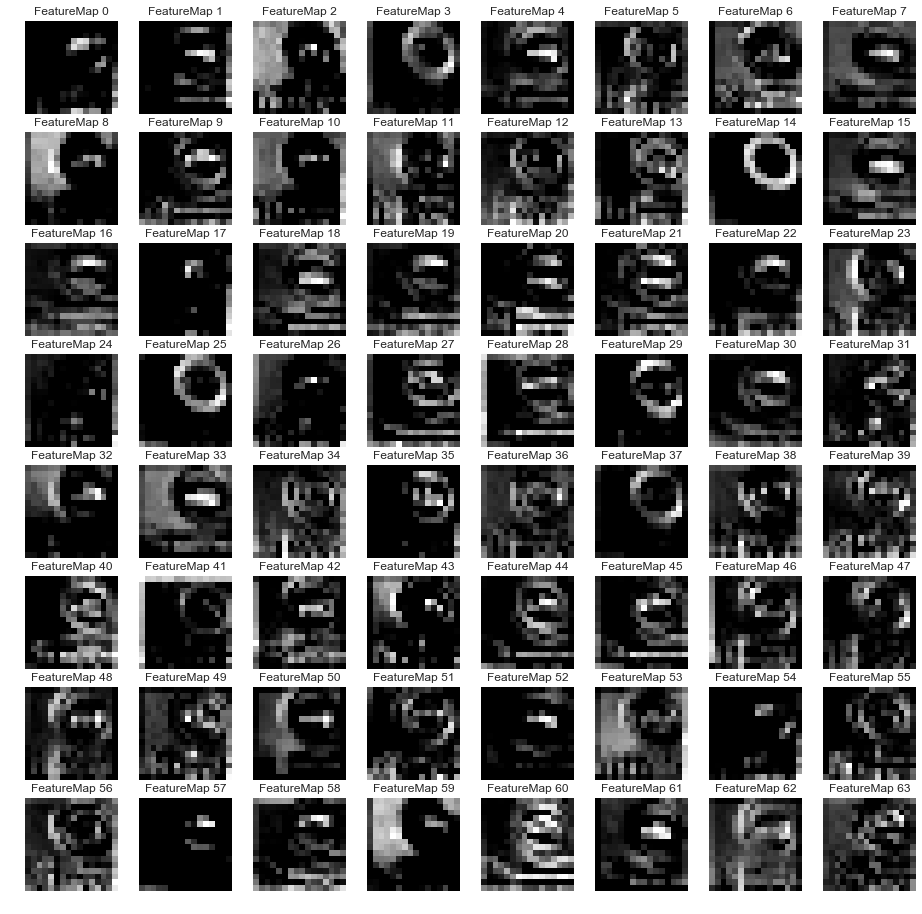

In [35]:
with tf.Session() as sess:
    op = sess.graph.get_operations()
    names = [m.values() for m in op]
    sess.run(init)
    
    saver = tf.train.Saver()
    
    if os.path.isfile(ckpt_file + '.meta'):
        saver.restore(sess, ckpt_file)
        
    pool0 = tf.get_default_graph().get_tensor_by_name('pool0:0')
    outputFeatureMap(X_test_new[[0]], pool0)

***Feature Map of the GoogLeNet-like Network***

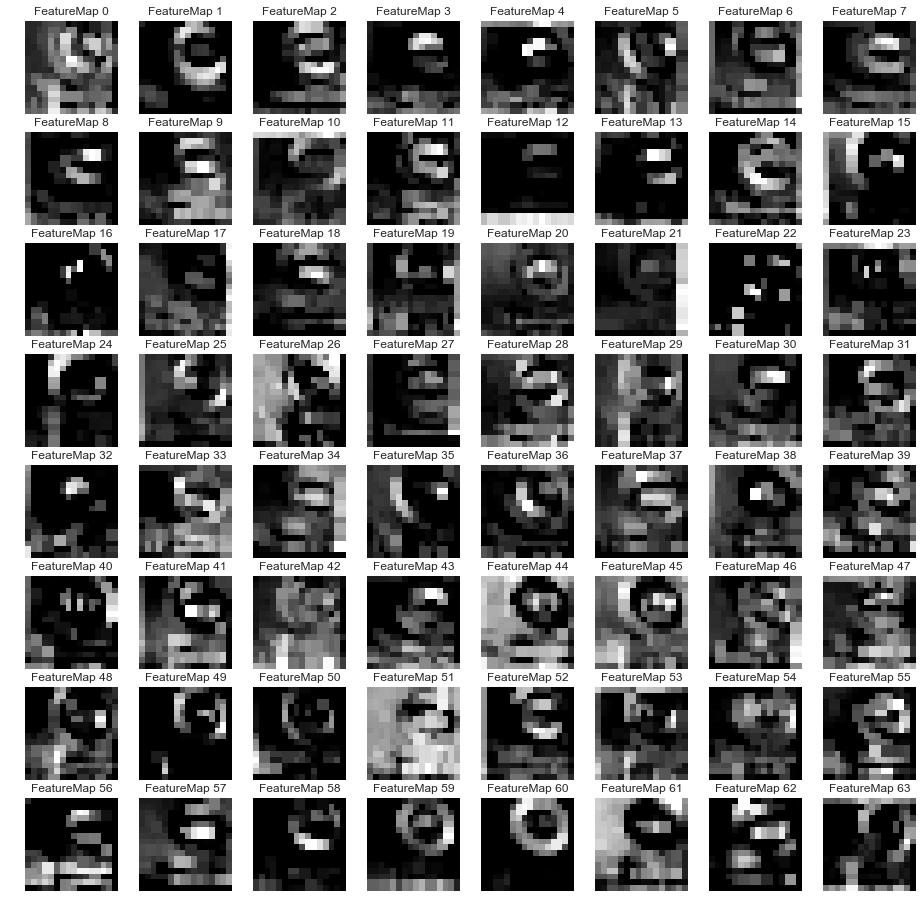

In [51]:
with tf.Session() as sess:
    op = sess.graph.get_operations()
    names = [m.values() for m in op]
    sess.run(init)
    
    saver = tf.train.Saver()
    
    if os.path.isfile(ckpt_file + '.meta'):
        saver.restore(sess, ckpt_file)
        
    pool0 = tf.get_default_graph().get_tensor_by_name('pool0:0')
    outputFeatureMap(X_test_new[[0]], pool0)